In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import torch

In [2]:
from scipy.stats import uniform, norm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [11]:
np.random.seed(0)
A = 1.2
b = -0.3
sigma = 0.2
N = 100

In [12]:
X = torch.from_numpy(uniform.rvs(size=N))
X.detach()
X = X.float()

In [13]:
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()

In [14]:
y = A*X + b + e

In [15]:
y.detach()
y = y.float()

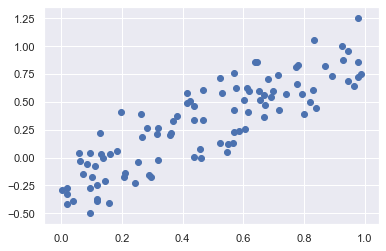

In [16]:
plt.scatter(X,y)

In [19]:
mu_A = 0.0
sigma_A =  1.0
qA = torch.distributions.normal.Normal(mu_A, sigma_A)

mu_b = 0.0
sigma_b = 1.0
qb = torch.distributions.normal.Normal(mu_b, sigma_b)

In [50]:
lst_lp = []

In [51]:
for j in range(0,50000):
    A = qA.sample()
    b = qb.sample()

    y_pred = A*X + b
    pData = torch.distributions.normal.Normal(y_pred, 0.2)

    lp = pData.log_prob(y).sum()
    lst_lp.append(lp)

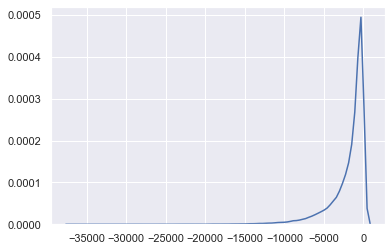

In [52]:
sns.distplot(lst_lp,hist=False, kde=True, bins=1000);

In [53]:
LP = torch.stack(lst_lp)

In [54]:
LP.mean()

tensor(-1862.2136)

In [55]:
LP.std()

tensor(2403.3530)